In [4]:
import pandas as pd

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_Indi_['2024-09'].csv")
df = pd.read_csv(file_path)

# Drop rows with missing values
df_cleaned = df.dropna().copy()

# Define categorical encoding based on user instructions
encoding_map = {
    'is_trp_active': {'Y': 1, 'N': 0},
    'is_nil_return': {'Y': 1, 'N': 0},
    'filing_status': {
        'CREDIT FILER': 0, 'NIL FILER': 1, 'NON FILER': 2, 'PAYMENT FILER': 3, 'ZERO FILER': 4
    },
    'filing_time': {'LATE FILER': 0, 'ON-TIME FILER': 1},
    'special_table': {'COMPLIANT': 0, 'NOT COMPLIANT': 1}
}

# Apply encoding to categorical columns
for column, mapping in encoding_map.items():
    df_cleaned[column] = df_cleaned[column].map(mapping)

# Keep only relevant columns
columns_to_keep = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'filing_time', 'special_table']
df_cleaned = df_cleaned[columns_to_keep]

# Display the cleaned dataset
print("Cleaned Dataset Head:")
print(df_cleaned.head())

# Save the cleaned dataset
df_cleaned.to_csv("C:/Users/user/Downloads/VAT_Indi_['2024-09']_A.csv", index=False)



Cleaned Dataset Head:
   is_trp_active  is_nil_return  gross_tax    net_tax  filing_status  \
0              1              1       0.00       0.00              1   
1              1              0    2312.65    2312.65              3   
2              1              0       0.00 -260489.68              0   
3              1              0       0.00   -2161.00              0   
4              1              0   -8093.08   -8093.08              0   

   filing_time  special_table  
0            1              0  
1            1              0  
2            1              0  
3            1              0  
4            1              0  



Summary Statistics:
       is_trp_active  is_nil_return     gross_tax       net_tax  \
count  421716.000000  421716.000000  4.217160e+05  4.217160e+05   
mean        0.990432       0.139945  1.376218e+06 -1.657563e+06   
std         0.097347       0.346930  7.836761e+08  9.589237e+08   
min         0.000000       0.000000 -6.929633e+08 -2.069470e+11   
25%         1.000000       0.000000  0.000000e+00 -1.187320e+05   
50%         1.000000       0.000000  0.000000e+00 -5.288640e+03   
75%         1.000000       0.000000  2.018634e+04  9.851175e+02   
max         1.000000       1.000000  5.088780e+11  5.088780e+11   

       filing_status    filing_time  special_table  
count  421716.000000  421716.000000  421716.000000  
mean        1.020383       0.936324       0.016838  
std         1.348688       0.244174       0.128666  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.000000       0.000000  
50%         0.000000       1.000000       0.000000  
75% 

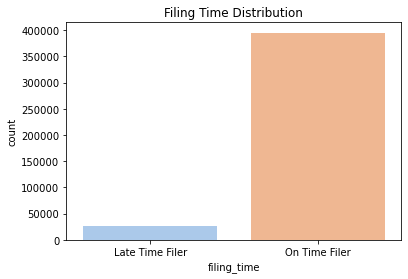

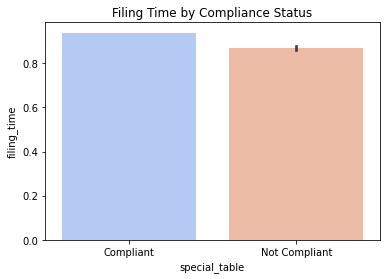

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_Indi_['2024-09']_A.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Keep only the specified columns
df = df[['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'filing_time', 'special_table']]

# Compute summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot the distribution of 'filing_time'
sns.countplot(x='filing_time', data=df, palette='pastel')
plt.title('Filing Time Distribution')
plt.xticks(ticks=[0, 1], labels=['Late Time Filer', 'On Time Filer'])
plt.show()

# Check filing time based on compliance status
sns.barplot(x='special_table', y='filing_time', data=df, palette='coolwarm')
plt.title('Filing Time by Compliance Status')
plt.xticks(ticks=[0, 1], labels=['Compliant', 'Not Compliant'])
plt.show()



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_Indi_['2024-09']_A.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Select relevant features
features = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'filing_time', 'special_table']
df = df[features]

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['filing_status'], drop_first=True)

# Apply feature scaling to numerical variables
scaler = StandardScaler()
df[['gross_tax', 'net_tax']] = scaler.fit_transform(df[['gross_tax', 'net_tax']])

# Display processed dataset
print("\nProcessed dataset:")
print(df.head())




Processed dataset:
   is_trp_active  is_nil_return  gross_tax   net_tax  filing_time  \
0              1              1  -0.001756  0.001729            1   
1              1              0  -0.001753  0.001731            1   
2              1              0  -0.001756  0.001457            1   
3              1              0  -0.001756  0.001726            1   
4              1              0  -0.001766  0.001720            1   

   special_table  filing_status_1  filing_status_3  filing_status_4  
0              0                1                0                0  
1              0                0                1                0  
2              0                0                0                0  
3              0                0                0                0  
4              0                0                0                0  


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_Indi_['2024-09']_A.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Select relevant features
selected_features = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'special_table']
X = df[selected_features].copy()
y = df['filing_time'].copy()

# Convert categorical variables to numeric (one-hot encoding)
X = pd.get_dummies(X, columns=['filing_status'], drop_first=True)

# Apply feature scaling
scaler = StandardScaler()
X[['gross_tax', 'net_tax']] = scaler.fit_transform(X[['gross_tax', 'net_tax']])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(log_model.coef_, columns=X.columns)
print(coefficients)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model
print("\nModel Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))




Model Coefficients:
   is_trp_active  is_nil_return  gross_tax   net_tax  special_table  \
0      -0.116985      -0.525982  -0.057078 -0.091619      -0.690851   

   filing_status_1  filing_status_3  filing_status_4  
0        -0.525982        -0.016197        -0.767064  

Model Accuracy on Test Data: 0.9363084511049986

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5371
           1       0.94      1.00      0.97     78973

    accuracy                           0.94     84344
   macro avg       0.47      0.50      0.48     84344
weighted avg       0.88      0.94      0.91     84344




Model Coefficients:
   is_trp_active  is_nil_return  gross_tax   net_tax  special_table  \
0      -0.116985      -0.525982  -0.057078 -0.091619      -0.690851   

   filing_status_1  filing_status_3  filing_status_4  
0        -0.525982        -0.016197        -0.767064  

Model Accuracy on Test Data: 0.9363084511049986

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5371
           1       0.94      1.00      0.97     78973

    accuracy                           0.94     84344
   macro avg       0.47      0.50      0.48     84344
weighted avg       0.88      0.94      0.91     84344



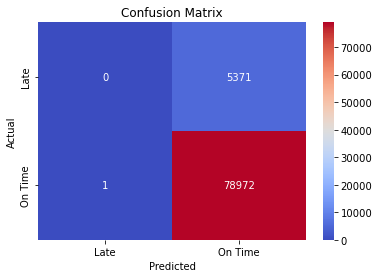

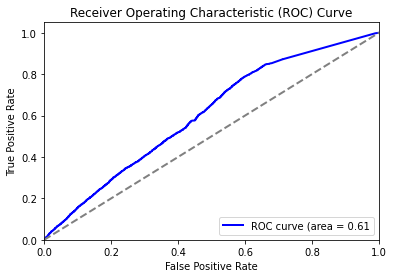

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_Indi_['2024-09']_A.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Select relevant features
selected_features = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'special_table']
X = df[selected_features].copy()
y = df['filing_time'].copy()

# Convert categorical variables to numeric (one-hot encoding)
X = pd.get_dummies(X, columns=['filing_status'], drop_first=True)

# Apply feature scaling
scaler = StandardScaler()
X[['gross_tax', 'net_tax']] = scaler.fit_transform(X[['gross_tax', 'net_tax']])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(log_model.coef_, columns=X.columns)
print(coefficients)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model
print("\nModel Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Late', 'On Time'], yticklabels=['Late', 'On Time'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
